In [12]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import re
from PIL import Image
import os
from matplotlib.pyplot import figure

from skimage.io import imread
from skimage.io.collection import alphanumeric_key
from dask import delayed
import dask.array as da
#import pycudadecon
#import napari
#from naparimovie import Movie
from functools import partial

import zarr
import dask

In [15]:
base_folder = r'\\10.245.74.40\Turing3\Pu\Aire\DNAFISH08062021'

In [17]:
folders = [os.path.join(base_folder, _fd) for _fd in os.listdir(base_folder)
           if _fd[0] in 'DHP']

In [18]:
folders

['\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\DAPI',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb0',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb1',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb10',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb11',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb12',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb13',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb15',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb16',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb17',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb18',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb19',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb2',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb20',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFISH08062021\\Hyb21',
 '\\\\10.245.74.40\\Turing3\\Pu\\Aire\\DNAFI

In [72]:
sel_folder = folders[2]
image_names = [_fd for _fd in os.listdir(sel_folder) if _fd.split(os.extsep)[-1]=='zarr']
fov_names = [_nm.split(os.extsep)[0].split('_')[1] for _nm in image_names]
image_channel = np.unique([_nm.split(os.extsep)[0].split('_')[0] for _nm in image_names])

In [80]:
sel_fov = fov_names[1]
sel_channel = image_channel[1]
zarr_path = os.path.join(sel_folder, f"{sel_channel}_{sel_fov}.zarr")
print(zarr_path)

\\10.245.74.40\Turing3\Pu\Aire\DNAFISH08062021\Hyb1\647_001.zarr


In [81]:
z1 = zarr.open(zarr_path, mode='r')
z1array = z1[sel_fov]['data_deskewed']

In [82]:
z1array

<zarr.core.Array '/001/data_deskewed' (167, 2304, 1690) uint16 read-only>

In [83]:
stack = da.from_zarr(z1array)
chunk = (100,2304,2304)
stack = stack.rechunk(chunk)
stack

dask.array<rechunk-merge, shape=(167, 2304, 1690), dtype=uint16, chunksize=(100, 2304, 1690), chunktype=numpy.ndarray>

In [84]:
import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

214444


<IPython.core.display.Javascript object>


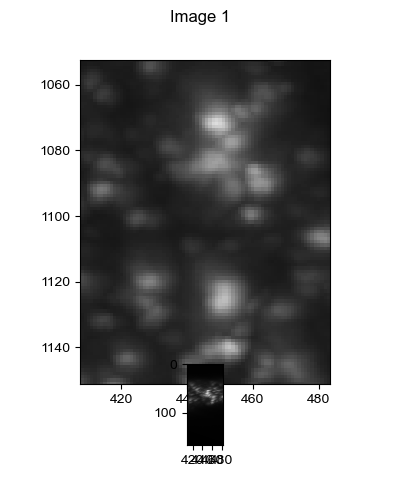

In [85]:
visual_tools.imshow_mark_3d_v2([stack])